In [23]:
import matplotlib.pyplot as plt
import pandas as pd



In [24]:
data = pd.read_csv("bmw.csv")
print(data)
#transmission 變速箱種類
#fueltype 燃料種類
#mpg 油耗


           model  year  price transmission  mileage fuelType  tax   mpg  \
0       5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1       6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2       5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3       1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4       7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   
...          ...   ...    ...          ...      ...      ...  ...   ...   
10776         X3  2016  19000    Automatic    40818   Diesel  150  54.3   
10777   5 Series  2016  14600    Automatic    42947   Diesel  125  60.1   
10778   3 Series  2017  13100       Manual    25468   Petrol  200  42.8   
10779   1 Series  2014   9930    Automatic    45000   Diesel   30  64.2   
10780         X1  2017  15981    Automatic    59432   Diesel  125  57.6   

       engineSize  
0             2.0  
1             2.0  
2             3.0  
3             1.5  

In [25]:
print(data.dtypes)

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


In [4]:
print(pd.isna(data).sum())

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [5]:
print(data.describe())

               year          price        mileage           tax           mpg  \
count  10781.000000   10781.000000   10781.000000  10781.000000  10781.000000   
mean    2017.078935   22733.408867   25496.986550    131.702068     56.399035   
std        2.349038   11415.528189   25143.192559     61.510755     31.336958   
min     1996.000000    1200.000000       1.000000      0.000000      5.500000   
25%     2016.000000   14950.000000    5529.000000    135.000000     45.600000   
50%     2017.000000   20462.000000   18347.000000    145.000000     53.300000   
75%     2019.000000   27940.000000   38206.000000    145.000000     62.800000   
max     2020.000000  123456.000000  214000.000000    580.000000    470.800000   

         engineSize  
count  10781.000000  
mean       2.167767  
std        0.552054  
min        0.000000  
25%        2.000000  
50%        2.000000  
75%        2.000000  
max        6.600000  


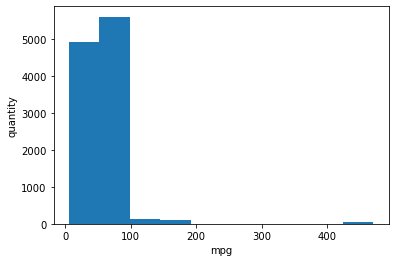

In [28]:
plt.hist(data["mpg"])
plt.xlabel("mpg")
plt.ylabel("quantity")
plt.show()

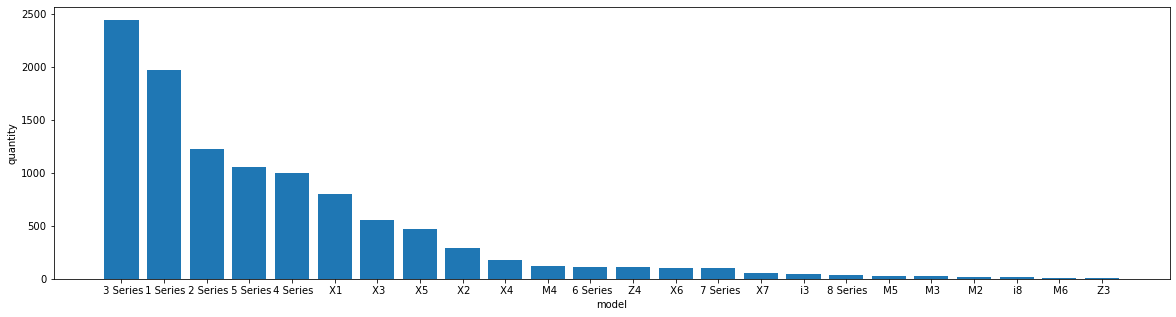

In [31]:
model = data["model"].value_counts()
plt.figure(figsize=(20,5))
plt.bar(model.index, model.values)
plt.xlabel("model")
plt.ylabel("quantity")
plt.show()

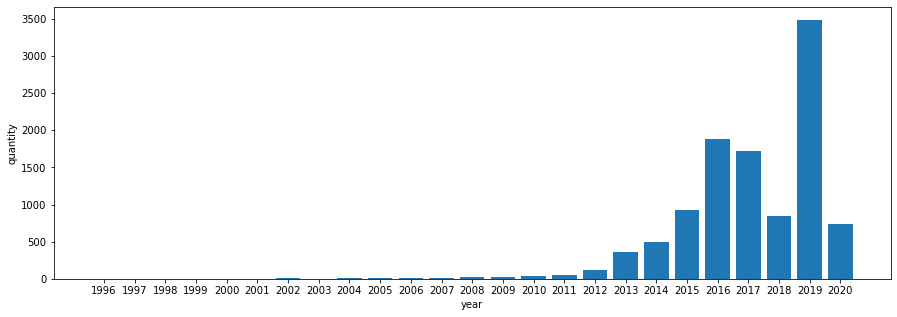

In [32]:
year = data["year"].value_counts()
plt.figure(figsize=(15,5))
plt.bar(year.index, year.values)
plt.xticks(year.index)
plt.xlabel("year")
plt.ylabel("quantity")
plt.show()

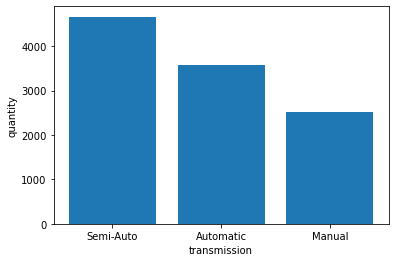

In [33]:
transmission = data["transmission"].value_counts()
plt.bar(transmission.index, transmission.values)
plt.xticks(transmission.index)
plt.xlabel("transmission")
plt.ylabel("quantity")
plt.show()

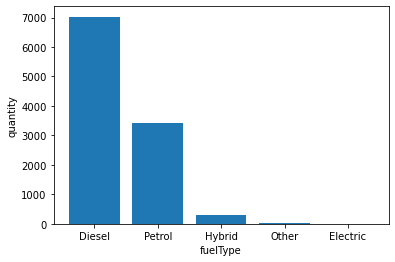

In [34]:
fuelType = data["fuelType"].value_counts()
plt.bar(fuelType.index, fuelType.values)
plt.xticks(fuelType.index)
plt.xlabel("fuelType")
plt.ylabel("quantity")
plt.show()

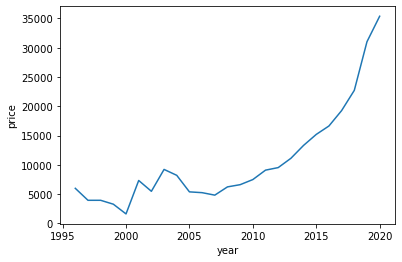

In [35]:


year_price = data.groupby("year").mean()
plt.plot(year_price.index,year_price["price"])
plt.xlabel("year")
plt.ylabel("price")
plt.show()






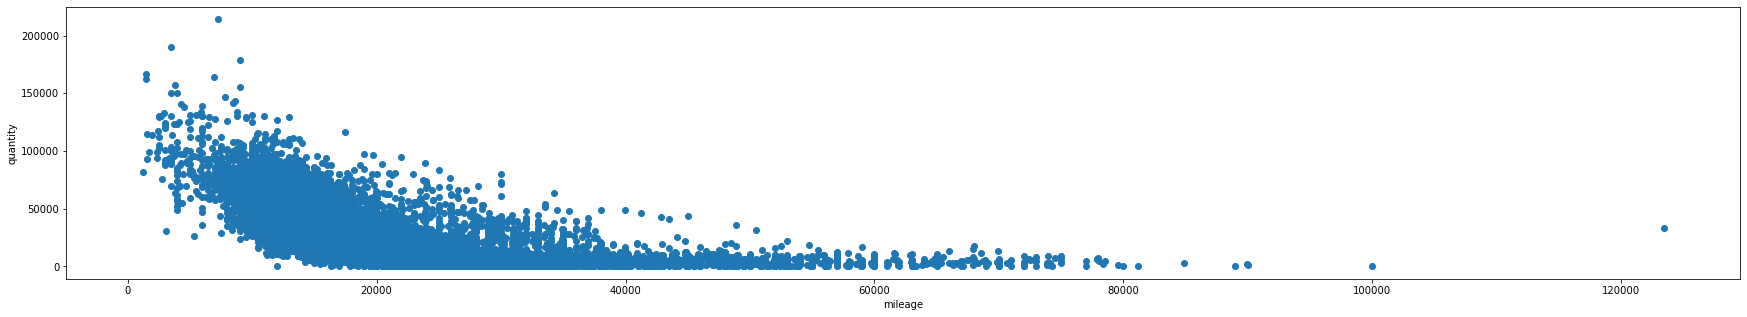

In [36]:
plt.figure(figsize=(30,5))
plt.scatter(data["price"],data["mileage"])
plt.xlabel("mileage")
plt.ylabel("quantity")
plt.show()

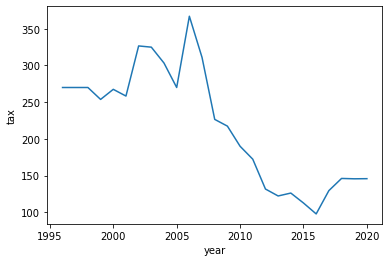

In [37]:
year_tax = data.groupby("year").mean()
plt.plot(year_tax.index,year_tax["tax"])
plt.xlabel("year")
plt.ylabel("tax")
plt.show()


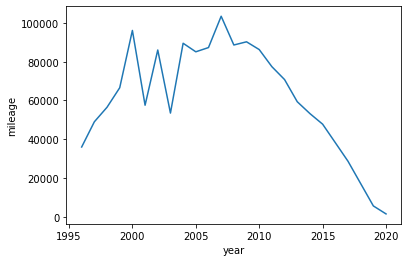

In [38]:
year_mileage = data.groupby("year").mean()
plt.plot(year_mileage.index,year_mileage["mileage"])
plt.xlabel("year")
plt.ylabel("mileage")
plt.show()

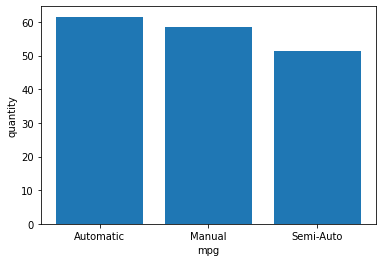

In [39]:
transmission_mpg = data.groupby("transmission").mean()
plt.bar(transmission_mpg.index, transmission_mpg["mpg"])
plt.xlabel("mpg")
plt.ylabel("quantity")
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [17]:
result = data["price"]
data = data.drop("price", axis=1)

model = pd.get_dummies(data["model"])
transmission = pd.get_dummies(data["transmission"])
fuelType = pd.get_dummies(data["fuelType"])
data = data.drop(["model", "transmission", "fuelType"], axis=1)

data.loc[:,[ "mileage", "tax", "mpg", "engineSize" ]] = StandardScaler().fit_transform(data.loc[:,["mileage", "tax", "mpg", "engineSize" ]])
data["year"] = LabelEncoder().fit_transform(data["year"])
data = pd.concat([data, model, transmission, fuelType], axis=1)

print(data)

       year   mileage       tax       mpg  engineSize   1 Series   2 Series  \
0        18  1.653447 -0.108963  0.038326   -0.303911          0          0   
1        22 -0.424388  0.216199 -0.433982   -0.303911          0          0   
2        20  1.483453  0.460070 -0.159533    1.507591          0          0   
3        21  0.046894  0.216199  0.510634   -1.209662          1          0   
4        18  0.559104  0.460070 -0.191445    1.507591          0          0   
...     ...       ...       ...       ...         ...        ...        ...   
10776    20  0.609379  0.297489 -0.066986   -0.303911          0          0   
10777    20  0.694058 -0.108963  0.118108   -0.303911          0          0   
10778    21 -0.001153  1.110393 -0.433982   -0.303911          0          0   
10779    18  0.775714 -1.653480  0.248950   -0.303911          1          0   
10780    21  1.349733 -0.108963  0.038326   -0.303911          0          0   

        3 Series   4 Series   5 Series  ...   i3   

In [18]:

feature_train, feature_test, result_train, result_test = train_test_split(data, result, test_size=0.2, random_state=0)

param = {"n_estimators":[10**i for i in range(1,4)],
         "max_depth":[5,10,15,20,25,30,35,40]
         }

model = GridSearchCV(RandomForestRegressor(), param_grid=param)

model.fit(feature_train, result_train)

print("訓練 MSE:", mean_squared_error( result_train, model.predict(feature_train)))
print("訓練 R2 Score:" , r2_score( result_train, model.predict(feature_train)))

print("測試 MSE:", mean_squared_error(result_test, model.predict(feature_test)))
print("測試 R2 Score:" , r2_score(result_test, model.predict(feature_test)))
print("最佳參數:", model.best_params_)







訓練 MSE: 925970.4457269255
訓練 R2 Score: 0.9928791591710184
測試 MSE: 11937423.84379307
測試 R2 Score: 0.9090842555652388
最佳參數: {'max_depth': 20, 'n_estimators': 1000}


In [19]:
import numpy as np
feature_train, feature_test, result_train, result_test = train_test_split(data, result, test_size=0.2, random_state=0)
model = RandomForestRegressor(max_depth=30, n_estimators=1000)
model.fit(feature_train, result_train)
print("訓練 MAE:", mean_absolute_error( result_train, model.predict(feature_train)))
print("訓練 R2 Score:" , r2_score( result_train, model.predict(feature_train)))

print("測試 MAE:", mean_absolute_error(result_test, model.predict(feature_test)))
print("測試 R2 Score:" , r2_score(result_test, model.predict(feature_test)))

訓練 MAE: 563.9644094117064
訓練 R2 Score: 0.9937782314917482
測試 MAE: 1602.2826549776096
測試 R2 Score: 0.9086643574546216


In [ ]:
a = model.feature_importances_
plt.figure(figsize=(35,5))
plt.bar(feature_train.columns, a)



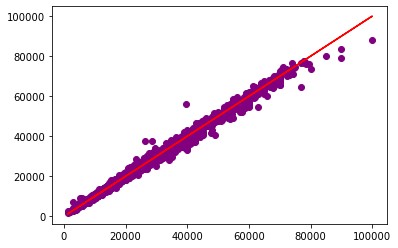

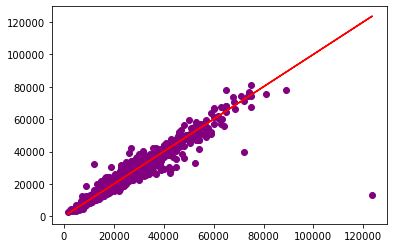

In [22]:
plt.scatter(result_train, model.predict(feature_train), color="purple")
plt.plot(result_train, result_train, color          ="red")
plt.show()

plt.scatter(result_test, model.predict(feature_test), color="purple")
plt.plot(result_test, result_test, color="red")
plt.show()